In [1]:
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Load the iris dataset
iris=load_iris()
data=pd.DataFrame(data=iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
data['species']=iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data.shape

(150, 5)

In [5]:
#Features
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [6]:
data['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [7]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
data.mode()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.0,3.0,1.4,0.2,0
1,NaN,NaN,1.5,NaN,1
2,NaN,NaN,NaN,NaN,2


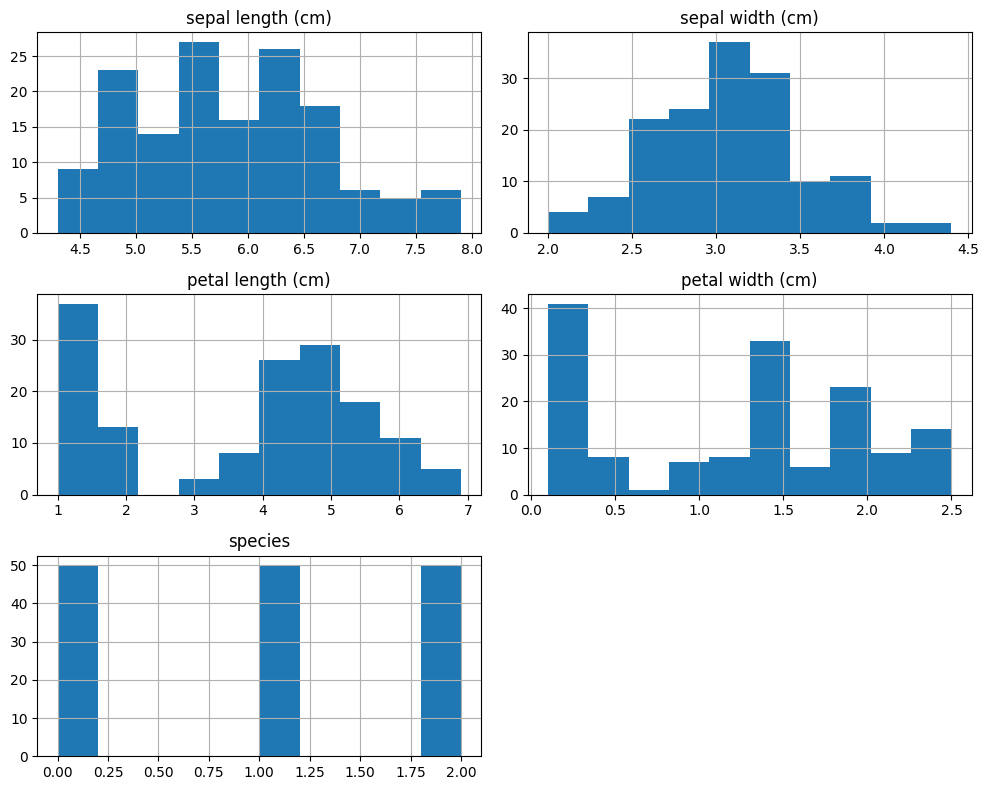

In [9]:
data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

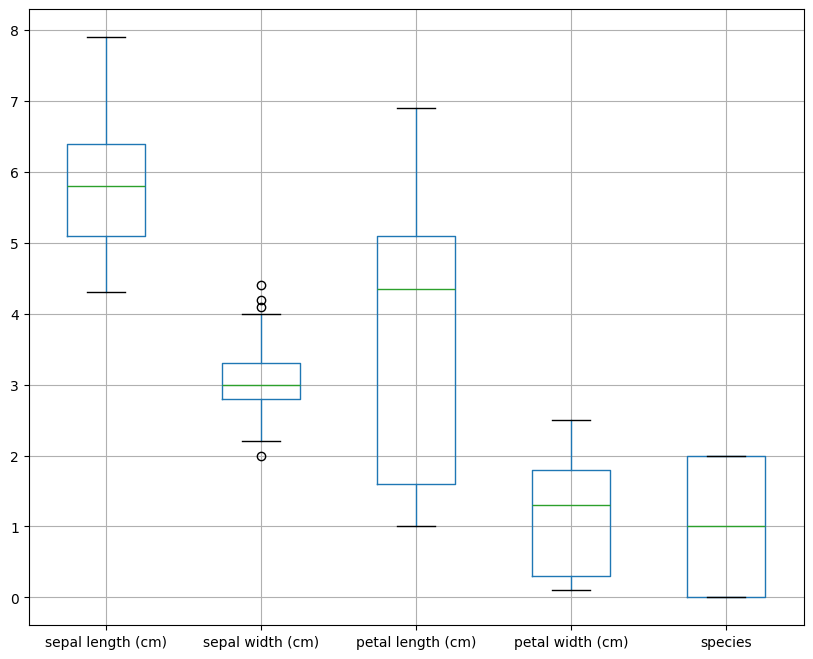

In [10]:
data.boxplot(figsize=(10,8))
plt.show

In [11]:
#Winsorization
%pip install scipy
from scipy.stats.mstats import winsorize

data['sepal width (cm)']=winsorize(data['sepal width (cm)'], limits=(0.05,0.05))

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


**Winsorization** is a technique used in statistics to mitigate the impact of outliers in a dataset. It involves setting extreme values to be equal to some percentile of the data, rather than their original value. This approach helps in stabilizing statistical analysis and modeling by reducing the influence of outliers without completely removing them.

Here's how winsorization typically works:

1. Identify outliers: Begin by identifying outliers in your dataset. Outliers are data points that are significantly different from other observations in the dataset.
2. Determine the winsorization thresholds: Decide on the percentile values that will be used as the threshold for winsorization. Common choices include the 1st and 99th percentiles, or any other percentile that is deemed appropriate based on the data and the analysis objectives.
3. Replace outliers: For values above the upper winsorization threshold, replace them with the value at the upper winsorization threshold. Similarly, for values below the lower winsorization threshold, replace them with the value at the lower winsorization threshold.

In [12]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

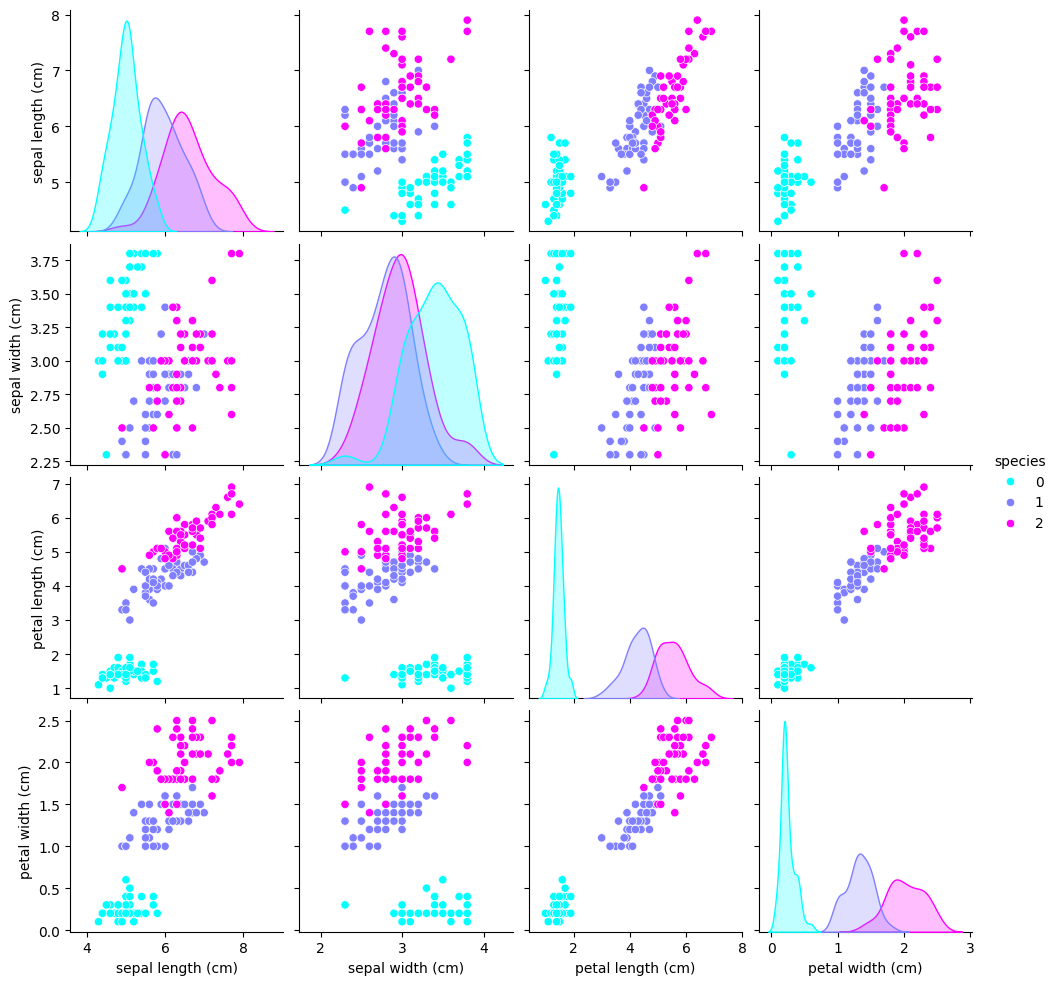

In [16]:
#Bivariate analysis
sns.pairplot(data,hue='species',palette='cool')
plt.show()

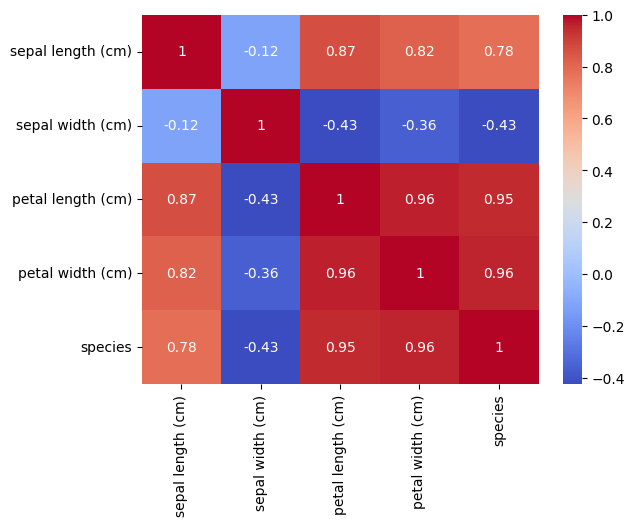

In [21]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

### Multivariate Analysis -PCA
1. Principal Component Analysis: dimonsionality reduction techniques that transform the original features into a new set of uncorrelated features called principal components.
2. PCA helps identify patterns and structure in high-dimensional data by finding the directions of maximum variance


### Multivarite Analysis - K-means Clustering

1. K-means clustering is an unsupervised learning algorithm that partitions the data intoK clusters based on similarity.
2. Aiming to minimize the within-cluster sum of squares (WCSS) or the Euclidean distance between data points ad their centroids


### Feature Importance
1. refer to the relative contribution of each feature in predicting the target variable
2. The prediction of a model is only as good as the features used to make the prediction, thus we want the most important predictors.
3. aseess feature importance using statistical tests and machine learning techniques.


### Decision tree and Random Forests
1. They are algorithms that can provide feature importances scores.
2. The importance score represents the decrease in impurity or increase in information gain achieved by splitting on a particular feature

### Simple Linear Regression: Assumptions and Limitations 
1. independence: The observations should be independent of each other.
2. homoscedasticity: The variability of y should be constant across all values of x.
3. Normality: The errors should be normally distributed.


### Evaluation Metrics
1. MSE: lower, better
2. R-squared: closer to 1, better
3. Accuracy: used for classification

### Parameter Tuning
1. the process of finding the optimal values fora model's hyperparameters to improve its performance
2. hyperparameters: learning rate, regularization strength, nnumber of iterations